# Visualizations

In this tutorial, we introduce the basic visualizations of proxies with `cfr`.

In [3]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the PAGES2k network stored in a pandas `DataFrame`

In [4]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

In [5]:
pdb = cfr.ProxyDatabase().from_df(df)
pdb

## Visualize a `ProxyRecord`

We may plot a static image using the `matplotlib` backend.

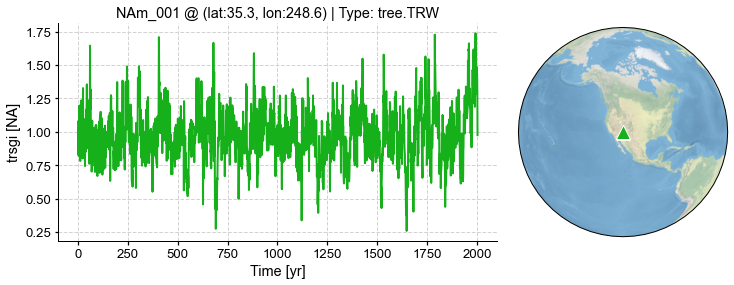

Figure saved at: "figs/pobj_example.pdf"


In [6]:
fig, ax = pdb.records['NAm_001'].plot()
cfr.showfig(fig)
cfr.savefig(fig, './figs/pobj_example.pdf')

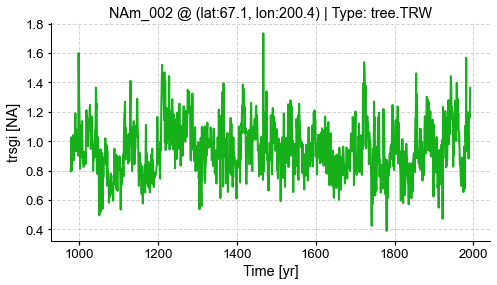

In [7]:
fig, ax = pdb.records['NAm_002'].plot(plot_map=False)

## Visualize a `ProxyDatabase`

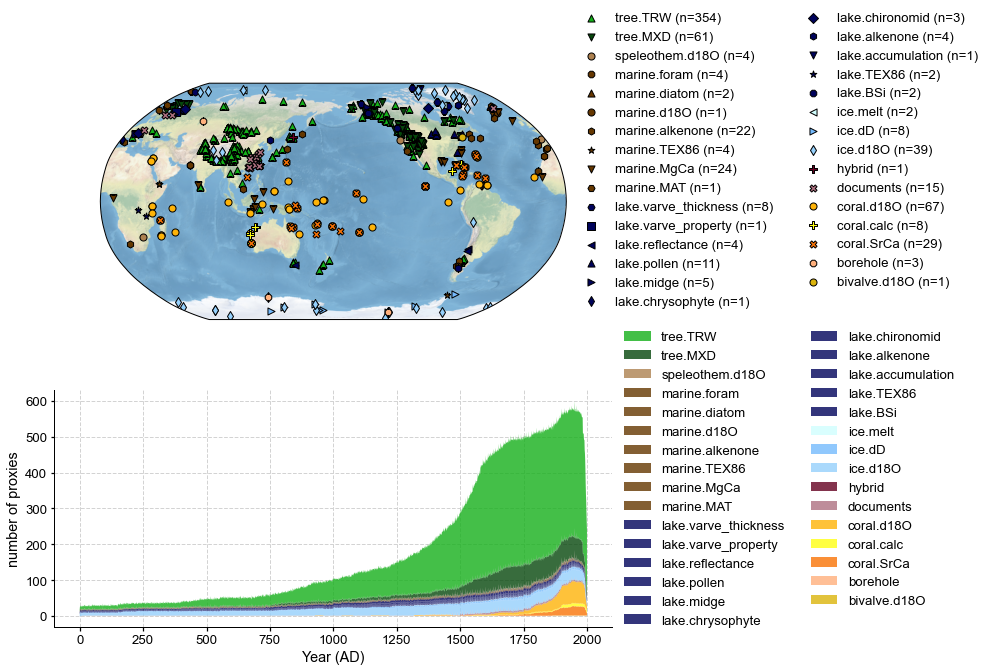

In [9]:
fig, ax = pdb.plot(plot_count=True)

## Plot a composite of a `ProxyDatabase`

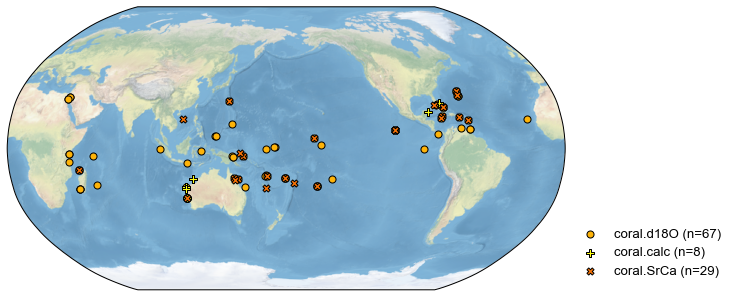

In [13]:
pdb_coral = pdb.filter(by='ptype', keys='coral')
fig, ax = pdb_coral.plot()

In [22]:
smooth_time, smooth_value = pdb_coral.make_composite('./data/gistemp1200_ERSSTv4.nc', vn='tempanomaly')

Analyzing ProxyRecord: 100%|██████████| 104/104 [00:08<00:00, 11.67it/s]


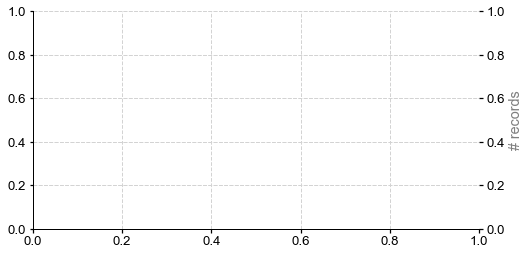

In [26]:
fig, ax = pdb_coral.plot_composite()

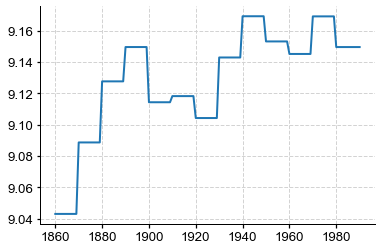

In [23]:
pid = 'Ocn_069'
import matplotlib.pyplot as plt

plt.plot(smooth_time[pid], smooth_value[pid])